# Praca dyplomowa magisterska
Jakub Sikora

## Porównanie działania mikrofonu kierunkowego oraz mikrofonu dookólnego

Celem badań jest zbadanie jakości rozpoznawania głosu za pomocą różnych mikrofonów:
- `rode` - mikrofonu kierunkowego średniej jakości Rode Videomic GO,
- `stagg` - mikrofonu dooólnego Stagg SUSM60D,
- `sennheiser` - mikrofonu kierunkowego Sennheiser MKE600,
- `tbone` - mikrofonu kierunkowego t.bone EM9600

In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

ModuleNotFoundError: No module named 'matplotlib'

### Dane
Nagrania były realizowane za pomocą dwóch różnych aplikacji, przez co przechowywane były w dwóch różnych strukturach plików.   

#### Nagrywane audio recorderem

In [2]:
all_files = [
    './wyniki-po-transkrypcji/lab012-rode-no-context.csv',
    './wyniki-po-transkrypcji/lab012-stagg-no-context.csv',
    './wyniki-po-transkrypcji/riviera-rode-no-context.csv',
    './wyniki-po-transkrypcji/riviera-stagg-no-context.csv'
]

dataframes = []
for filename in all_files:
    df = pd.read_csv(filename, index_col=None, header=0)
    dataframes.append(df)
audio_recorder_no_context = pd.concat(dataframes, axis=0, ignore_index=True)
audio_recorder_no_context['context'] = 'no-context'

NameError: name 'pd' is not defined

In [3]:
all_files = [
    './wyniki-po-transkrypcji/lab012-rode-simple-context.csv',
    './wyniki-po-transkrypcji/lab012-stagg-simple-context.csv',
    './wyniki-po-transkrypcji/riviera-rode-simple-context.csv',
    './wyniki-po-transkrypcji/riviera-stagg-simple-context.csv'
]

dataframes = []
for filename in all_files:
    df = pd.read_csv(filename, index_col=None, header=0)
    dataframes.append(df)
audio_recorder_simple_context = pd.concat(dataframes, axis=0, ignore_index=True)
audio_recorder_simple_context['context'] = 'simple'

In [4]:
all_files = [
    './wyniki-po-transkrypcji/lab012-rode-full-context.csv',
    './wyniki-po-transkrypcji/lab012-stagg-full-context.csv',
    './wyniki-po-transkrypcji/riviera-rode-full-context.csv',
    './wyniki-po-transkrypcji/riviera-stagg-full-context.csv'
]

dataframes = []
for filename in all_files:
    df = pd.read_csv(filename, index_col=None, header=0)
    dataframes.append(df)
audio_recorder_full_context = pd.concat(dataframes, axis=0, ignore_index=True)
audio_recorder_full_context['context'] = 'full'

In [5]:
df_a = pd.concat([audio_recorder_no_context, audio_recorder_simple_context, audio_recorder_full_context], axis=0, ignore_index=True)
df_a = df_a.drop(['Unnamed: 0'], axis=1)
df_a['program'] = 'audio_recorder'
df_a['eksperyment'] = None
df_a['mikrofon'] = None
df_a['komenda'] = None
df_a['punkt'] = None

In [6]:
df_a.loc[df_a['path'].str.contains('riviera/'), 'eksperyment'] = 'riv'
df_a.loc[df_a['path'].str.contains('lab012/'), 'eksperyment'] = 'lab'

df_a.loc[df_a['path'].str.contains('rode/'), 'mikrofon'] = 'rode'
df_a.loc[df_a['path'].str.contains('stagg/'), 'mikrofon'] = 'stagg'
df_a.loc[df_a['path'].str.contains('rode/'), 'mikrofon'] = 'rode'
df_a.loc[df_a['path'].str.contains('rode-tyl/'), 'mikrofon'] = 'rode-tyl'
df_a.loc[df_a['path'].str.contains('stagg/'), 'mikrofon'] = 'stagg'

df_a.loc[df_a['path'].str.contains('herbata/'), 'komenda'] = 'herbata'
df_a.loc[df_a['path'].str.contains('potwierdzam/'), 'komenda'] = 'potwierdzam'
df_a.loc[df_a['path'].str.contains('przyjedz/'), 'komenda'] = 'przyjedz'

df_a.loc[df_a['path'].str.contains('/1/'), 'punkt'] = 1
df_a.loc[df_a['path'].str.contains('/2/'), 'punkt'] = 2
df_a.loc[df_a['path'].str.contains('/3/'), 'punkt'] = 3
df_a.loc[df_a['path'].str.contains('/4/'), 'punkt'] = 4
df_a.loc[df_a['path'].str.contains('/5/'), 'punkt'] = 5
df_a.loc[df_a['path'].str.contains('/6/'), 'punkt'] = 6
df_a.loc[df_a['path'].str.contains('/7/'), 'punkt'] = 7
df_a.loc[df_a['path'].str.contains('/8/'), 'punkt'] = 8
df_a.loc[df_a['path'].str.contains('/9/'), 'punkt'] = 9
df_a.loc[df_a['path'].str.contains('/10/'), 'punkt'] = 10
df_a.loc[df_a['path'].str.contains('/11/'), 'punkt'] = 11
df_a.loc[df_a['path'].str.contains('/12/'), 'punkt'] = 12

df_a.loc[df_a['path'].str.contains('/1m/'), 'punkt'] = 1
df_a.loc[df_a['path'].str.contains('/2m/'), 'punkt'] = 2
df_a.loc[df_a['path'].str.contains('/3m/'), 'punkt'] = 3
df_a.loc[df_a['path'].str.contains('/4m/'), 'punkt'] = 4
df_a.loc[df_a['path'].str.contains('/5m/'), 'punkt'] = 5
df_a.loc[df_a['path'].str.contains('/6m/'), 'punkt'] = 6

df_a = df_a.drop(['path'], axis=1)

#### Nagrywane aplikacją Maksyma

In [7]:
maksym_recorder_no_context = pd.read_csv('./wyniki-po-transkrypcji/lab012-sennheiser-tbone-no-context.csv', index_col=None, header=0)
maksym_recorder_no_context['context'] = 'no-context'
maksym_recorder_simple_context = pd.read_csv('./wyniki-po-transkrypcji/lab012-sennheiser-tbone-simple-context.csv', index_col=None, header=0)
maksym_recorder_simple_context['context'] = 'simple'
maksym_recorder_full_context = pd.read_csv('./wyniki-po-transkrypcji/lab012-sennheiser-tbone-full-context.csv', index_col=None, header=0)
maksym_recorder_full_context['context'] = 'full'

df_m = pd.concat([maksym_recorder_no_context, maksym_recorder_simple_context, maksym_recorder_full_context], axis=0, ignore_index=True)
df_m = df_m.drop(['Unnamed: 0'], axis=1)
df_m['eksperyment'] = 'lab'
df_m['program'] = 'maksym'
df_m['mikrofon'] = None
df_m['komenda'] = None
df_m['punkt'] = None

In [8]:
df_m = df_m[~df_m['path'].str.contains('mtest')]

df_m.loc[df_m['path'].str.contains('_1-'), 'mikrofon'] = 'sennheiser'
df_m.loc[df_m['path'].str.contains('_2-'), 'mikrofon'] = 'tbone'

df_m.loc[df_m['path'].str.contains('-01.wav'), 'komenda'] = 'herbata'
df_m.loc[df_m['path'].str.contains('-02.wav'), 'komenda'] = 'potwierdzam'
df_m.loc[df_m['path'].str.contains('-03.wav'), 'komenda'] = 'przyjedz'

df_m.loc[df_m['path'].str.contains('501m'), 'punkt'] = 1
df_m.loc[df_m['path'].str.contains('502m'), 'punkt'] = 2
df_m.loc[df_m['path'].str.contains('503m'), 'punkt'] = 3
df_m.loc[df_m['path'].str.contains('504m'), 'punkt'] = 4
df_m.loc[df_m['path'].str.contains('505m'), 'punkt'] = 5
df_m.loc[df_m['path'].str.contains('506m'), 'punkt'] = 6
df_m.loc[df_m['path'].str.contains('507m'), 'punkt'] = 7
df_m.loc[df_m['path'].str.contains('508m'), 'punkt'] = 8
df_m.loc[df_m['path'].str.contains('509m'), 'punkt'] = 9
df_m.loc[df_m['path'].str.contains('510m'), 'punkt'] = 10
df_m.loc[df_m['path'].str.contains('511m'), 'punkt'] = 11
df_m.loc[df_m['path'].str.contains('512m'), 'punkt'] = 12

df_m = df_m.drop(['path'], axis=1)

In [9]:
df = pd.concat([df_a, df_m], axis=0, ignore_index=True)

In [10]:
df.head()

,transcription,context,confidence,program,eksperyment,mikrofon,komenda,punkt
0,helikop Przynieś herbatę,no-context,NaN,audio_recorder,lab,rode,herbata,11
1,heliko Przynieś herbatę,no-context,NaN,audio_recorder,lab,rode,herbata,11
2,Hejko niż herbata,no-context,NaN,audio_recorder,lab,rode,herbata,11
3,Hejka Przynieś herbatę,no-context,NaN,audio_recorder,lab,rode,herbata,11
4,henrico herbatę,no-context,NaN,audio_recorder,lab,rode,herbata,11


### Analiza transkrypcji

In [11]:
def get_similarity(cmd, transcript):
    if type(transcript) != str:
        return 'none'
    
    bow1 = cmd.lower().split(" ")
    bow2 = transcript.lower().replace(" tu", " tutaj").split(" ")
    
    count = 0
    for wx in bow1:
        for wy in bow2:
            if wx == wy:
                count += 1

    if count == len(bow2):
        return 'full'
    if count >= len(bow2) / 2:
        return 'partial'
    else:
        return 'none'

In [12]:
def label_result(row):
    transcript = row['transcription']
    if row['komenda'] == 'potwierdzam':
        sentence = 'hej rico potwierdzam'
    if row['komenda'] == 'przyjedz':
        sentence = 'hej rico przyjedź tutaj'
    if row['komenda'] == 'herbata':
        sentence = 'hej rico przynieś herbatę'
    return get_similarity(sentence, transcript)

In [13]:
def get_bar_scores(df):
    def occurs(df, pts):
        result = []
        for point in pts:
            result.append(len(df[df['punkt'] == point]))
        return result

    none_scores = occurs(df[df['result'] == 'none'], [1,2,3,4,5,6])
    partial_scores = occurs(df[df['result'] == 'partial'], [1,2,3,4,5,6])
    full_scores = occurs(df[df['result'] == 'full'], [1,2,3,4,5,6])
    return [none_scores, partial_scores, full_scores]

In [14]:
def get_bar_scores_for_point(df):
    none_scores = len(df[df['result'] == 'none'])
    partial_scores = len(df[df['result'] == 'partial'])
    full_scores = len(df[df['result'] == 'full'])
    return [none_scores, partial_scores, full_scores]

Oznacza wynik jako:
- full - pełna zgodność transkrypcji z oczekiwaną komendą
- partial - częściowa zgodność transkrypcji z oczekiwaną komendą (co najmniej połowa wyrazów)
- none - rozbieżność transkrypcji z oczekiwaną komendą

In [15]:
df['result'] = df.apply(lambda row: label_result(row), axis=1)

### Pierwszy eksperyment

Pierwszy eksperyment zbadał działanie mikrofonów `rode` oraz `stagg` w linii prostej, w zależności od odległości mikrofonu od źródła dźwięku. Za mikrofonem znajdowała się ściana. Zbadano sześć punktów oddalonych od siebie o jeden metr.

#### Bez wykorzystania kontekstu

In [16]:
riv_no_context_df = df[(df['eksperyment'] == 'riv') & (df['context'] == 'no-context')]
riv_rode_no_context_df = riv_no_context_df[riv_no_context_df['mikrofon'] == 'rode']
riv_stagg_no_context_df = riv_no_context_df[riv_no_context_df['mikrofon'] == 'stagg']

riv_rode_no_context_counts = [
    len(riv_rode_no_context_df[riv_rode_no_context_df['result'] == 'none']),
    len(riv_rode_no_context_df[riv_rode_no_context_df['result'] == 'partial']),
    len(riv_rode_no_context_df[riv_rode_no_context_df['result'] == 'full'])
]
riv_stagg_no_context_counts = [
    len(riv_stagg_no_context_df[riv_stagg_no_context_df['result'] == 'none']),
    len(riv_stagg_no_context_df[riv_stagg_no_context_df['result'] == 'partial']),
    len(riv_stagg_no_context_df[riv_stagg_no_context_df['result'] == 'full'])
]

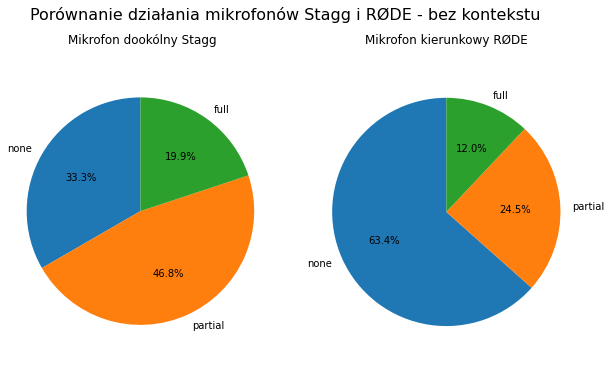

In [17]:
fig, axs = plt.subplots(1,2, figsize=(10, 6))
labels = ['none', 'partial', 'full']

fig.suptitle("Porównanie działania mikrofonów Stagg i RØDE - bez kontekstu", fontsize=16)

axs[0].pie(riv_stagg_no_context_counts, labels=labels, autopct='%1.1f%%', startangle=90)
axs[0].set_title('Mikrofon dookólny Stagg')
axs[0].axis('equal')
axs[1].pie(riv_rode_no_context_counts, labels=labels, autopct='%1.1f%%', startangle=90)
axs[1].set_title('Mikrofon kierunkowy RØDE')
axs[1].axis('equal')

plt.show()

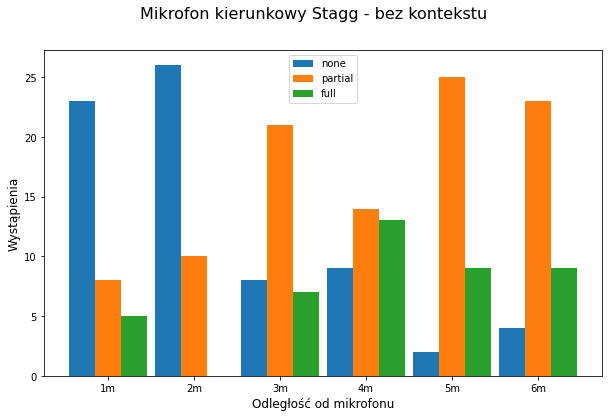

In [18]:
labels = ['1m', '2m', '3m', '4m', '5m', '6m']
[none_scores, partial_scores, full_scores] = get_bar_scores(riv_stagg_no_context_df)

x = np.arange(len(labels))
width = 0.3

fig, ax = plt.subplots(figsize=(10,6))
rects1 = ax.bar(x - width, none_scores, width, label='none')
rects2 = ax.bar(x, partial_scores, width, label='partial')
rects3 = ax.bar(x + width, full_scores, width, label='full')

fig.suptitle('Mikrofon kierunkowy Stagg - bez kontekstu', fontsize=16)
ax.set_xlabel('Odległość od mikrofonu', fontsize=12)
ax.set_ylabel('Wystąpienia', fontsize=12)
ax.set_xticks(x)
ax.set_xticklabels(labels)
plt.legend()
plt.show()

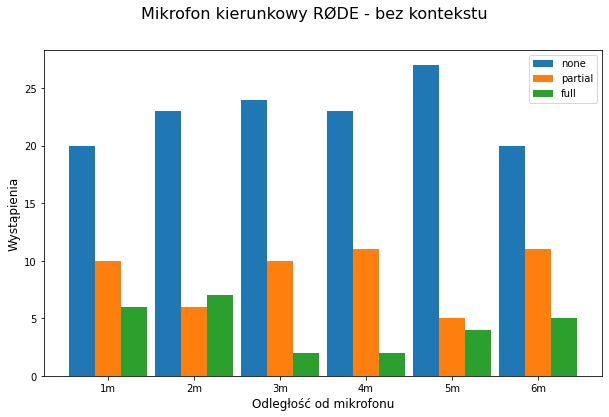

In [19]:
labels = ['1m', '2m', '3m', '4m', '5m', '6m']
[none_scores, partial_scores, full_scores] = get_bar_scores(riv_rode_no_context_df)

x = np.arange(len(labels))
width = 0.3

fig, ax = plt.subplots(figsize=(10,6))
rects1 = ax.bar(x - width, none_scores, width, label='none')
rects2 = ax.bar(x, partial_scores, width, label='partial')
rects3 = ax.bar(x + width, full_scores, width, label='full')

fig.suptitle('Mikrofon kierunkowy RØDE - bez kontekstu', fontsize=16)
ax.set_xlabel('Odległość od mikrofonu', fontsize=12)
ax.set_ylabel('Wystąpienia', fontsize=12)
ax.set_xticks(x)
ax.set_xticklabels(labels)
plt.legend()
plt.show()

#### Z wykorzystaniem prostego kontekstu

In [20]:
riv_simple_context_df = df[(df['eksperyment'] == 'riv') & (df['context'] == 'simple')]
riv_rode_simple_context_df = riv_simple_context_df[riv_simple_context_df['mikrofon'] == 'rode']
riv_stagg_simple_context_df = riv_simple_context_df[riv_simple_context_df['mikrofon'] == 'stagg']

riv_rode_simple_context_counts = [
    len(riv_rode_simple_context_df[riv_rode_simple_context_df['result'] == 'none']),
    len(riv_rode_simple_context_df[riv_rode_simple_context_df['result'] == 'partial']),
    len(riv_rode_simple_context_df[riv_rode_simple_context_df['result'] == 'full'])
]
riv_stagg_simple_context_counts = [
    len(riv_stagg_simple_context_df[riv_stagg_simple_context_df['result'] == 'none']),
    len(riv_stagg_simple_context_df[riv_stagg_simple_context_df['result'] == 'partial']),
    len(riv_stagg_simple_context_df[riv_stagg_simple_context_df['result'] == 'full'])
]

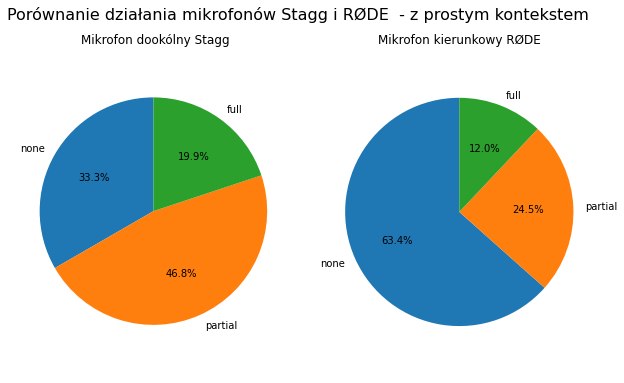

In [21]:
fig, axs = plt.subplots(1,2, figsize=(10, 6))
labels = ['none', 'partial', 'full']

fig.suptitle("Porównanie działania mikrofonów Stagg i RØDE  - z prostym kontekstem", fontsize=16)

axs[0].pie(riv_stagg_simple_context_counts, labels=labels, autopct='%1.1f%%', startangle=90)
axs[0].set_title('Mikrofon dookólny Stagg')
axs[0].axis('equal')

axs[1].pie(riv_rode_simple_context_counts, labels=labels, autopct='%1.1f%%', startangle=90)
axs[1].set_title('Mikrofon kierunkowy RØDE')
axs[1].axis('equal')

plt.show()

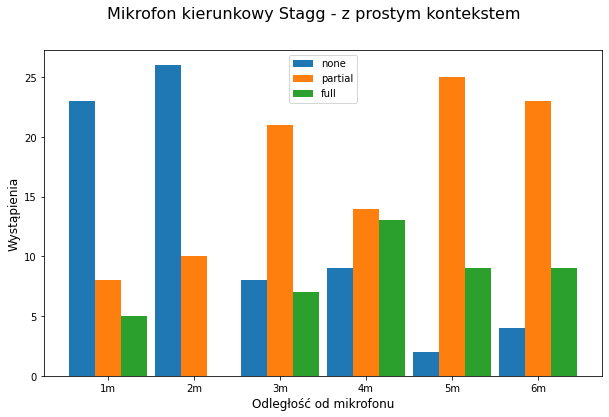

In [22]:
labels = ['1m', '2m', '3m', '4m', '5m', '6m']
[none_scores, partial_scores, full_scores] = get_bar_scores(riv_stagg_simple_context_df)

x = np.arange(len(labels))
width = 0.3

fig, ax = plt.subplots(figsize=(10,6))
rects1 = ax.bar(x - width, none_scores, width, label='none')
rects2 = ax.bar(x, partial_scores, width, label='partial')
rects3 = ax.bar(x + width, full_scores, width, label='full')

fig.suptitle('Mikrofon kierunkowy Stagg - z prostym kontekstem', fontsize=16)
ax.set_xlabel('Odległość od mikrofonu', fontsize=12)
ax.set_ylabel('Wystąpienia', fontsize=12)
ax.set_xticks(x)
ax.set_xticklabels(labels)
plt.legend()
plt.show()

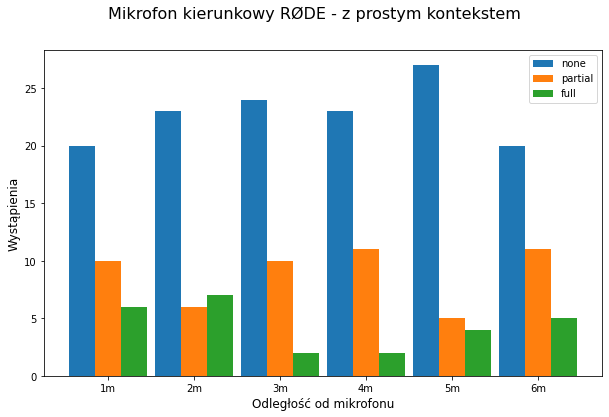

In [23]:
labels = ['1m', '2m', '3m', '4m', '5m', '6m']
[none_scores, partial_scores, full_scores] = get_bar_scores(riv_rode_simple_context_df)

x = np.arange(len(labels))
width = 0.3

fig, ax = plt.subplots(figsize=(10,6))
rects1 = ax.bar(x - width, none_scores, width, label='none')
rects2 = ax.bar(x, partial_scores, width, label='partial')
rects3 = ax.bar(x + width, full_scores, width, label='full')

fig.suptitle('Mikrofon kierunkowy RØDE - z prostym kontekstem', fontsize=16)
ax.set_xlabel('Odległość od mikrofonu', fontsize=12)
ax.set_ylabel('Wystąpienia', fontsize=12)
ax.set_xticks(x)
ax.set_xticklabels(labels)
plt.legend()
plt.show()

#### Z wykorzystaniem pełnego kontekstu

In [24]:
riv_full_context_df = df[(df['eksperyment'] == 'riv') & (df['context'] == 'simple')]
riv_rode_full_context_df = riv_full_context_df[riv_full_context_df['mikrofon'] == 'rode']
riv_stagg_full_context_df = riv_full_context_df[riv_full_context_df['mikrofon'] == 'stagg']

riv_stagg_full_context_counts = [
    len(riv_stagg_full_context_df[riv_stagg_full_context_df['result'] == 'none']),
    len(riv_stagg_full_context_df[riv_stagg_full_context_df['result'] == 'partial']),
    len(riv_stagg_full_context_df[riv_stagg_full_context_df['result'] == 'full'])
]
riv_rode_full_context_counts = [
    len(riv_rode_full_context_df[riv_rode_full_context_df['result'] == 'none']),
    len(riv_rode_full_context_df[riv_rode_full_context_df['result'] == 'partial']),
    len(riv_rode_full_context_df[riv_rode_full_context_df['result'] == 'full'])
]

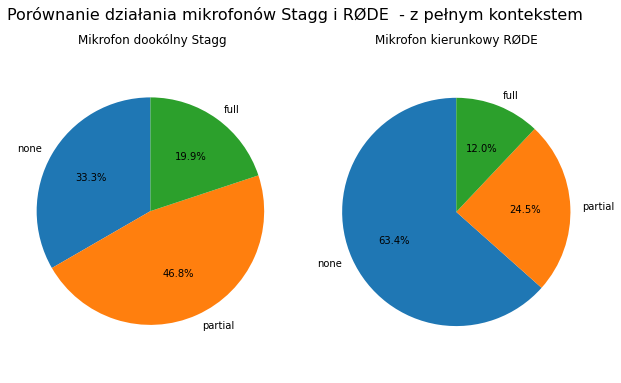

In [25]:
fig, axs = plt.subplots(1,2, figsize=(10, 6))
labels = ['none', 'partial', 'full']

fig.suptitle("Porównanie działania mikrofonów Stagg i RØDE  - z pełnym kontekstem", fontsize=16)

axs[0].pie(riv_stagg_full_context_counts, labels=labels, autopct='%1.1f%%', startangle=90)
axs[0].set_title('Mikrofon dookólny Stagg')
axs[0].axis('equal')

axs[1].pie(riv_rode_full_context_counts, labels=labels, autopct='%1.1f%%', startangle=90)
axs[1].set_title('Mikrofon kierunkowy RØDE')
axs[1].axis('equal')

plt.show()

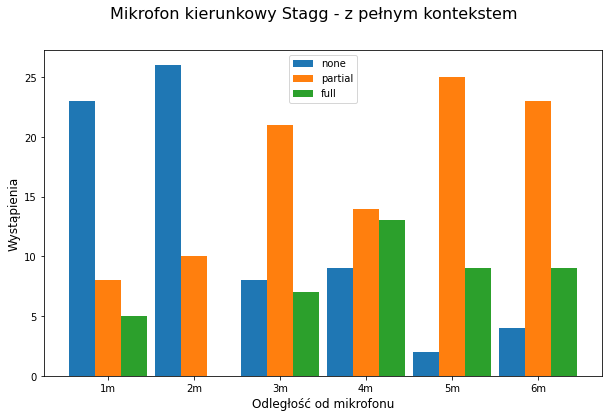

In [26]:
labels = ['1m', '2m', '3m', '4m', '5m', '6m']
[none_scores, partial_scores, full_scores] = get_bar_scores(riv_stagg_full_context_df)

x = np.arange(len(labels))
width = 0.3

fig, ax = plt.subplots(figsize=(10,6))
rects1 = ax.bar(x - width, none_scores, width, label='none')
rects2 = ax.bar(x, partial_scores, width, label='partial')
rects3 = ax.bar(x + width, full_scores, width, label='full')

fig.suptitle('Mikrofon kierunkowy Stagg - z pełnym kontekstem', fontsize=16)
ax.set_xlabel('Odległość od mikrofonu', fontsize=12)
ax.set_ylabel('Wystąpienia', fontsize=12)
ax.set_xticks(x)
ax.set_xticklabels(labels)
plt.legend()
plt.show()

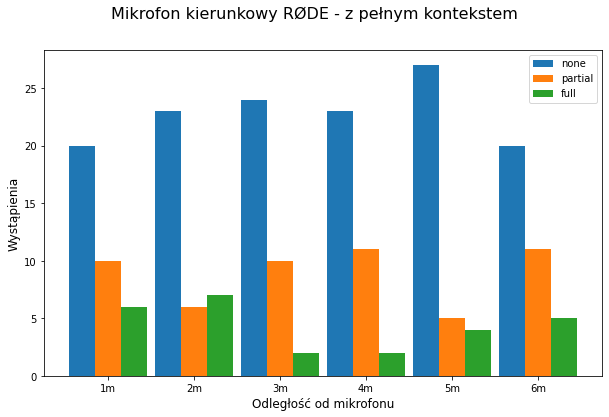

In [27]:
labels = ['1m', '2m', '3m', '4m', '5m', '6m']
[none_scores, partial_scores, full_scores] = get_bar_scores(riv_rode_full_context_df)

x = np.arange(len(labels))
width = 0.3

fig, ax = plt.subplots(figsize=(10,6))
rects1 = ax.bar(x - width, none_scores, width, label='none')
rects2 = ax.bar(x, partial_scores, width, label='partial')
rects3 = ax.bar(x + width, full_scores, width, label='full')

fig.suptitle('Mikrofon kierunkowy RØDE - z pełnym kontekstem', fontsize=16)
ax.set_xlabel('Odległość od mikrofonu', fontsize=12)
ax.set_ylabel('Wystąpienia', fontsize=12)
ax.set_xticks(x)
ax.set_xticklabels(labels)
plt.legend()
plt.show()

### Drugi eksperyment

Podczas drugiego eksperymentu odwzorowano badanie z artykułu (SoRoF) i zbadano działanie wszystkich mikrofonów w laboratorium 012 w dwunastu różnych punktach. Dla mikrofonu kierunkowego badano sytuację w której był on zwrócony w stronę źródła dźwięku.

#### Bez wykorzystania kontekstu

In [28]:
lab_no_context_df = df[(df['eksperyment'] == 'lab') & (df['context'] == 'no-context')]
lab_rode_no_context_df = lab_no_context_df[lab_no_context_df['mikrofon'] == 'rode']
lab_stagg_no_context_df = lab_no_context_df[lab_no_context_df['mikrofon'] == 'stagg']
lab_sennheiser_no_context_df = lab_no_context_df[lab_no_context_df['mikrofon'] == 'sennheiser']
lab_tbone_no_context_df = lab_no_context_df[lab_no_context_df['mikrofon'] == 'tbone']

lab_rode_no_context_counts = [
    len(lab_rode_no_context_df[lab_rode_no_context_df['result'] == 'none']),
    len(lab_rode_no_context_df[lab_rode_no_context_df['result'] == 'partial']),
    len(lab_rode_no_context_df[lab_rode_no_context_df['result'] == 'full'])
]
lab_stagg_no_context_counts = [
    len(lab_stagg_no_context_df[lab_stagg_no_context_df['result'] == 'none']),
    len(lab_stagg_no_context_df[lab_stagg_no_context_df['result'] == 'partial']),
    len(lab_stagg_no_context_df[lab_stagg_no_context_df['result'] == 'full'])
]
lab_sennheiser_no_context_counts = [
    len(lab_sennheiser_no_context_df[lab_sennheiser_no_context_df['result'] == 'none']),
    len(lab_sennheiser_no_context_df[lab_sennheiser_no_context_df['result'] == 'partial']),
    len(lab_sennheiser_no_context_df[lab_sennheiser_no_context_df['result'] == 'full'])
]
lab_tbone_no_context_counts = [
    len(lab_tbone_no_context_df[lab_tbone_no_context_df['result'] == 'none']),
    len(lab_tbone_no_context_df[lab_tbone_no_context_df['result'] == 'partial']),
    len(lab_tbone_no_context_df[lab_tbone_no_context_df['result'] == 'full'])
]

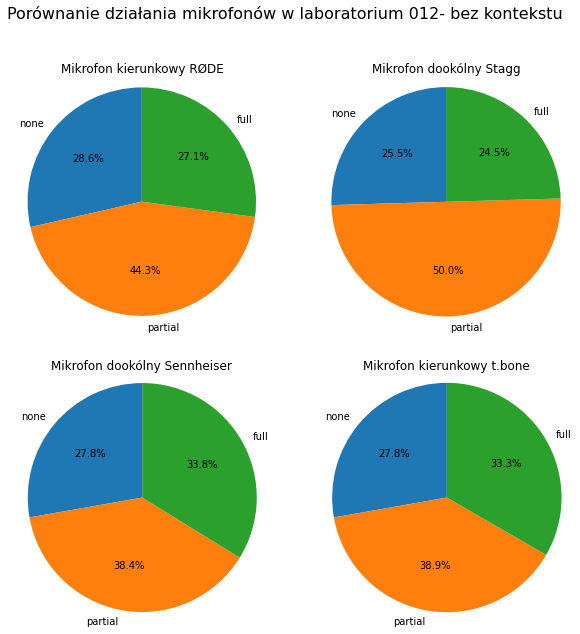

In [29]:
fig, axs = plt.subplots(2,2, figsize=(10, 10))
labels = ['none', 'partial', 'full']

fig.suptitle("Porównanie działania mikrofonów w laboratorium 012- bez kontekstu", fontsize=16)

axs[0][0].pie(lab_rode_no_context_counts, labels=labels, autopct='%1.1f%%', startangle=90)
axs[0][0].set_title('Mikrofon kierunkowy RØDE')
axs[0][0].axis('equal')
axs[0][1].pie(lab_stagg_no_context_counts, labels=labels, autopct='%1.1f%%', startangle=90)
axs[0][1].set_title('Mikrofon dookólny Stagg')
axs[0][1].axis('equal')
axs[1][0].pie(lab_sennheiser_no_context_counts, labels=labels, autopct='%1.1f%%', startangle=90)
axs[1][0].set_title('Mikrofon dookólny Sennheiser')
axs[1][0].axis('equal')
axs[1][1].pie(lab_tbone_no_context_counts, labels=labels, autopct='%1.1f%%', startangle=90)
axs[1][1].set_title('Mikrofon kierunkowy t.bone')
axs[1][1].axis('equal')

plt.show()

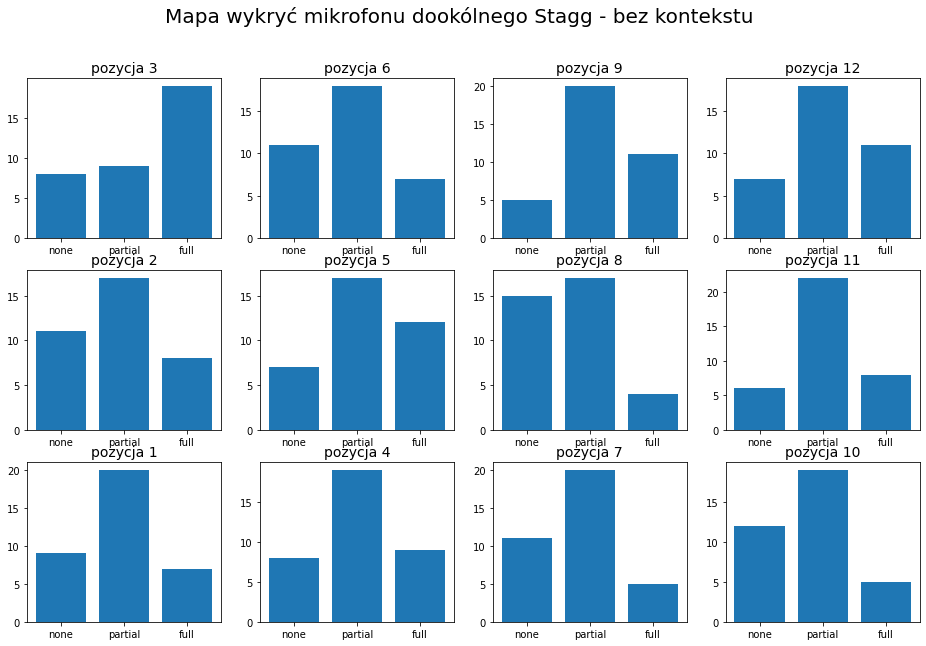

In [30]:
labels = [
    (0,2,'1'), (0,1,'2'), (0,0,'3'),
    (1,2,'4'), (1,1,'5'), (1,0,'6'),
    (2,2,'7'), (2,1,'8'), (2,0,'9'),
    (3,2,'10'), (3,1,'11'), (3,0,'12')
]

x = np.arange(len(labels))
width = 0.3

fig, axs = plt.subplots(3,4, figsize=(16,10))
for (j, i, label) in labels:
    scores = get_bar_scores_for_point(lab_stagg_no_context_df[lab_stagg_no_context_df['punkt'] == int(label)])
    axs[i][j].bar(['none', 'partial', 'full'], scores)
    axs[i][j].set_title(f"pozycja {label}", fontsize=14)

fig.suptitle("Mapa wykryć mikrofonu dookólnego Stagg - bez kontekstu", fontsize=20)
plt.show()

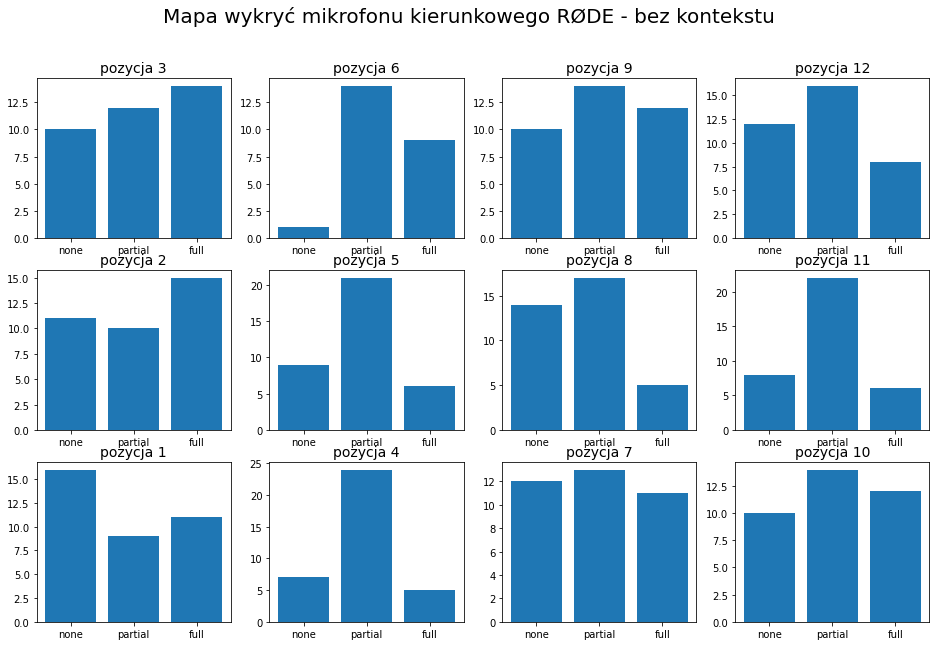

In [31]:
labels = [
    (0,2,'1'), (0,1,'2'), (0,0,'3'),
    (1,2,'4'), (1,1,'5'), (1,0,'6'),
    (2,2,'7'), (2,1,'8'), (2,0,'9'),
    (3,2,'10'), (3,1,'11'), (3,0,'12')
]

x = np.arange(len(labels))
width = 0.3

fig, axs = plt.subplots(3,4, figsize=(16,10))
for (j, i, label) in labels:
    scores = get_bar_scores_for_point(lab_rode_no_context_df[lab_rode_no_context_df['punkt'] == int(label)])
    axs[i][j].bar(['none', 'partial', 'full'], scores)
    axs[i][j].set_title(f"pozycja {label}", fontsize=14)

fig.suptitle("Mapa wykryć mikrofonu kierunkowego RØDE - bez kontekstu", fontsize=20)
plt.show()

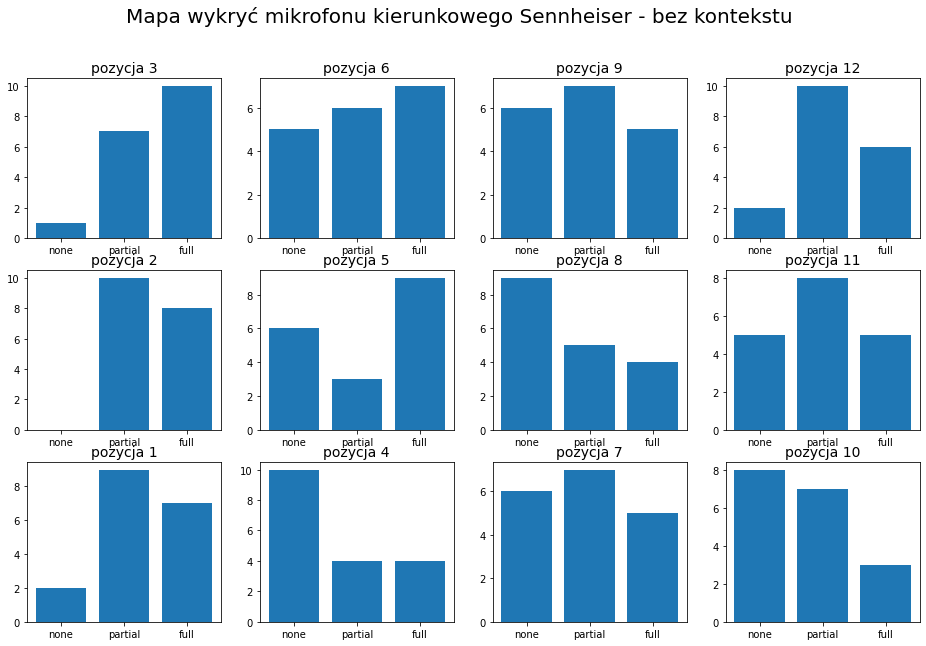

In [32]:
labels = [
    (0,2,'1'), (0,1,'2'), (0,0,'3'),
    (1,2,'4'), (1,1,'5'), (1,0,'6'),
    (2,2,'7'), (2,1,'8'), (2,0,'9'),
    (3,2,'10'), (3,1,'11'), (3,0,'12')
]

x = np.arange(len(labels))
width = 0.3

fig, axs = plt.subplots(3,4, figsize=(16,10))
for (j, i, label) in labels:
    scores = get_bar_scores_for_point(lab_sennheiser_no_context_df[lab_sennheiser_no_context_df['punkt'] == int(label)])
    axs[i][j].bar(['none', 'partial', 'full'], scores)
    axs[i][j].set_title(f"pozycja {label}", fontsize=14)

fig.suptitle("Mapa wykryć mikrofonu kierunkowego Sennheiser - bez kontekstu", fontsize=20)
plt.show()

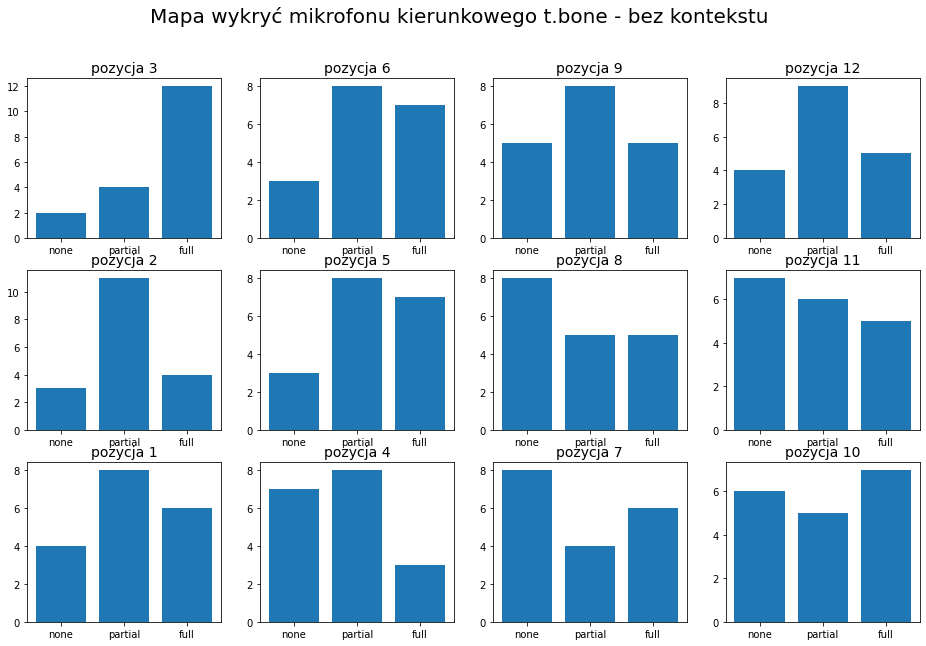

In [33]:
labels = [
    (0,2,'1'), (0,1,'2'), (0,0,'3'),
    (1,2,'4'), (1,1,'5'), (1,0,'6'),
    (2,2,'7'), (2,1,'8'), (2,0,'9'),
    (3,2,'10'), (3,1,'11'), (3,0,'12')
]

x = np.arange(len(labels))
width = 0.3

fig, axs = plt.subplots(3,4, figsize=(16,10))
for (j, i, label) in labels:
    scores = get_bar_scores_for_point(lab_tbone_no_context_df[lab_tbone_no_context_df['punkt'] == int(label)])
    axs[i][j].bar(['none', 'partial', 'full'], scores)
    axs[i][j].set_title(f"pozycja {label}", fontsize=14)

fig.suptitle("Mapa wykryć mikrofonu kierunkowego t.bone - bez kontekstu", fontsize=20)
plt.show()

#### Z wykorzystaniem prostego kontekstu

In [34]:
lab_simple_context_df = df[(df['eksperyment'] == 'lab') & (df['context'] == 'simple')]
lab_rode_simple_context_df = lab_simple_context_df[lab_simple_context_df['mikrofon'] == 'rode']
lab_stagg_simple_context_df = lab_simple_context_df[lab_simple_context_df['mikrofon'] == 'stagg']
lab_sennheiser_simple_context_df = lab_simple_context_df[lab_simple_context_df['mikrofon'] == 'sennheiser']
lab_tbone_simple_context_df = lab_simple_context_df[lab_simple_context_df['mikrofon'] == 'tbone']

lab_rode_simple_context_counts = [
    len(lab_rode_simple_context_df[lab_rode_simple_context_df['result'] == 'none']),
    len(lab_rode_simple_context_df[lab_rode_simple_context_df['result'] == 'partial']),
    len(lab_rode_simple_context_df[lab_rode_simple_context_df['result'] == 'full'])
]
lab_stagg_simple_context_counts = [
    len(lab_stagg_simple_context_df[lab_stagg_simple_context_df['result'] == 'none']),
    len(lab_stagg_simple_context_df[lab_stagg_simple_context_df['result'] == 'partial']),
    len(lab_stagg_simple_context_df[lab_stagg_simple_context_df['result'] == 'full'])
]
lab_sennheiser_simple_context_counts = [
    len(lab_sennheiser_simple_context_df[lab_sennheiser_simple_context_df['result'] == 'none']),
    len(lab_sennheiser_simple_context_df[lab_sennheiser_simple_context_df['result'] == 'partial']),
    len(lab_sennheiser_simple_context_df[lab_sennheiser_simple_context_df['result'] == 'full'])
]
lab_tbone_simple_context_counts = [
    len(lab_tbone_simple_context_df[lab_tbone_simple_context_df['result'] == 'none']),
    len(lab_tbone_simple_context_df[lab_tbone_simple_context_df['result'] == 'partial']),
    len(lab_tbone_simple_context_df[lab_tbone_simple_context_df['result'] == 'full'])
]

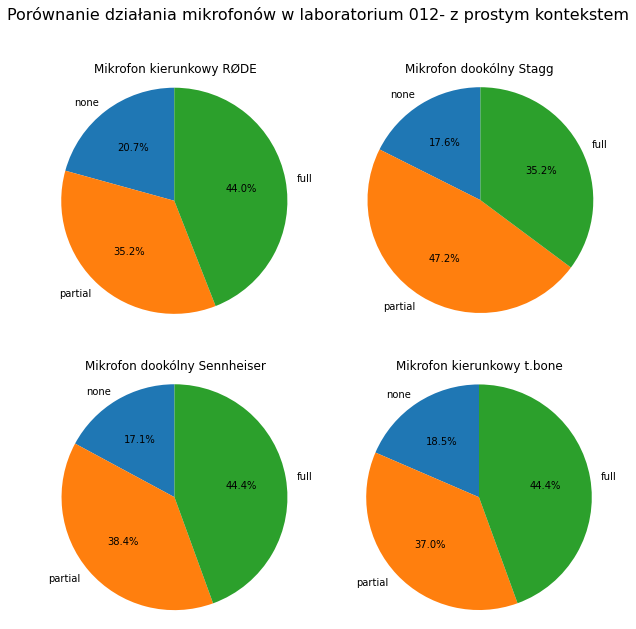

In [35]:
fig, axs = plt.subplots(2,2, figsize=(10, 10))
labels = ['none', 'partial', 'full']

fig.suptitle("Porównanie działania mikrofonów w laboratorium 012- z prostym kontekstem", fontsize=16)

axs[0][0].pie(lab_rode_simple_context_counts, labels=labels, autopct='%1.1f%%', startangle=90)
axs[0][0].set_title('Mikrofon kierunkowy RØDE')
axs[0][0].axis('equal')
axs[0][1].pie(lab_stagg_simple_context_counts, labels=labels, autopct='%1.1f%%', startangle=90)
axs[0][1].set_title('Mikrofon dookólny Stagg')
axs[0][1].axis('equal')
axs[1][0].pie(lab_sennheiser_simple_context_counts, labels=labels, autopct='%1.1f%%', startangle=90)
axs[1][0].set_title('Mikrofon dookólny Sennheiser')
axs[1][0].axis('equal')
axs[1][1].pie(lab_tbone_simple_context_counts, labels=labels, autopct='%1.1f%%', startangle=90)
axs[1][1].set_title('Mikrofon kierunkowy t.bone')
axs[1][1].axis('equal')

plt.show()

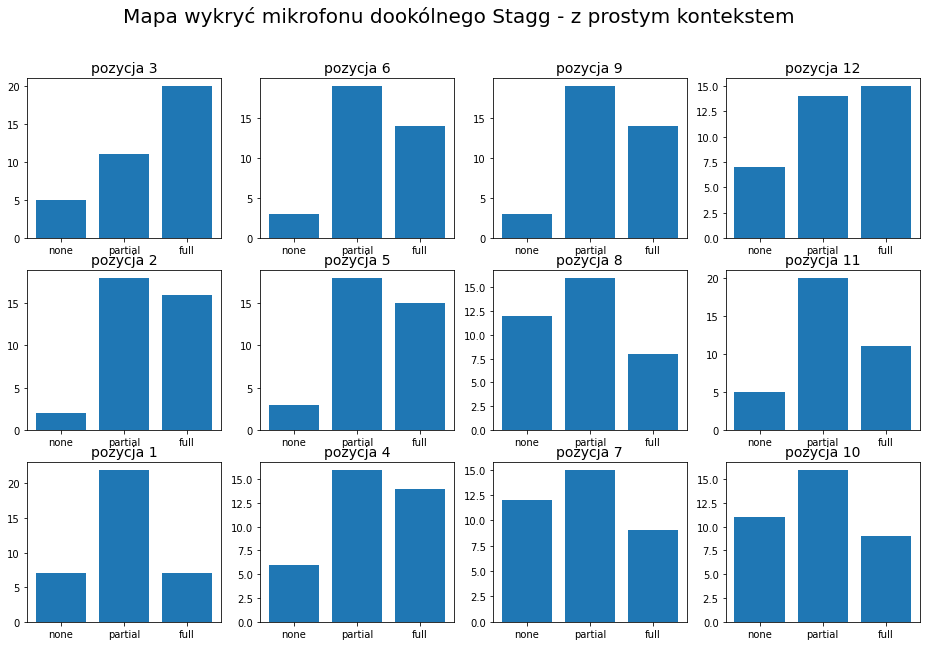

In [36]:
labels = [
    (0,2,'1'), (0,1,'2'), (0,0,'3'),
    (1,2,'4'), (1,1,'5'), (1,0,'6'),
    (2,2,'7'), (2,1,'8'), (2,0,'9'),
    (3,2,'10'), (3,1,'11'), (3,0,'12')
]

x = np.arange(len(labels))
width = 0.3

fig, axs = plt.subplots(3,4, figsize=(16,10))
for (j, i, label) in labels:
    scores = get_bar_scores_for_point(lab_stagg_simple_context_df[lab_stagg_simple_context_df['punkt'] == int(label)])
    axs[i][j].bar(['none', 'partial', 'full'], scores)
    axs[i][j].set_title(f"pozycja {label}", fontsize=14)

fig.suptitle("Mapa wykryć mikrofonu dookólnego Stagg - z prostym kontekstem", fontsize=20)
plt.show()

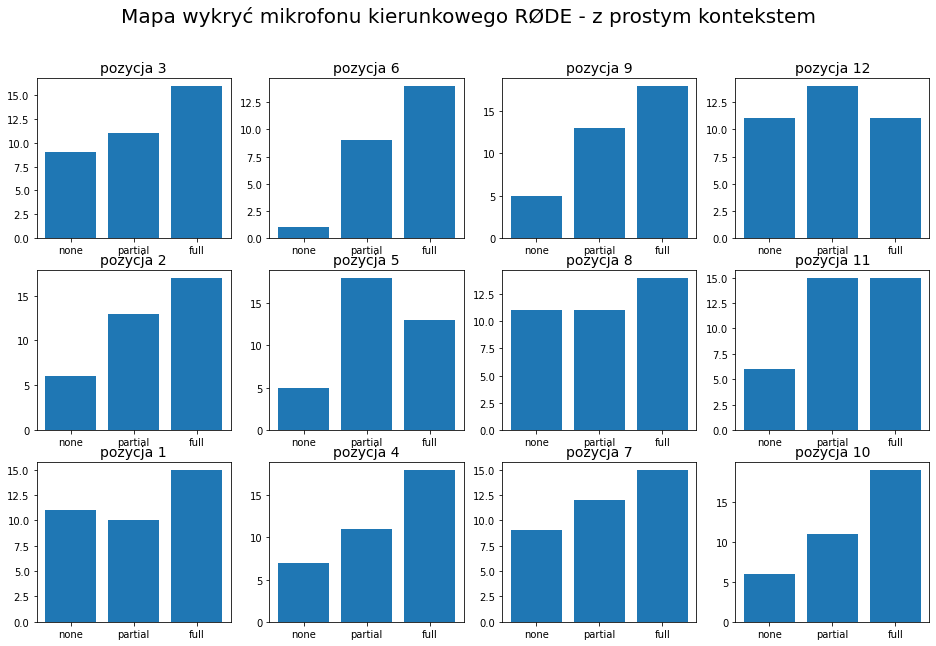

In [37]:
labels = [
    (0,2,'1'), (0,1,'2'), (0,0,'3'),
    (1,2,'4'), (1,1,'5'), (1,0,'6'),
    (2,2,'7'), (2,1,'8'), (2,0,'9'),
    (3,2,'10'), (3,1,'11'), (3,0,'12')
]

x = np.arange(len(labels))
width = 0.3

fig, axs = plt.subplots(3,4, figsize=(16,10))
for (j, i, label) in labels:
    scores = get_bar_scores_for_point(lab_rode_simple_context_df[lab_rode_simple_context_df['punkt'] == int(label)])
    axs[i][j].bar(['none', 'partial', 'full'], scores)
    axs[i][j].set_title(f"pozycja {label}", fontsize=14)

fig.suptitle("Mapa wykryć mikrofonu kierunkowego RØDE - z prostym kontekstem", fontsize=20)
plt.show()

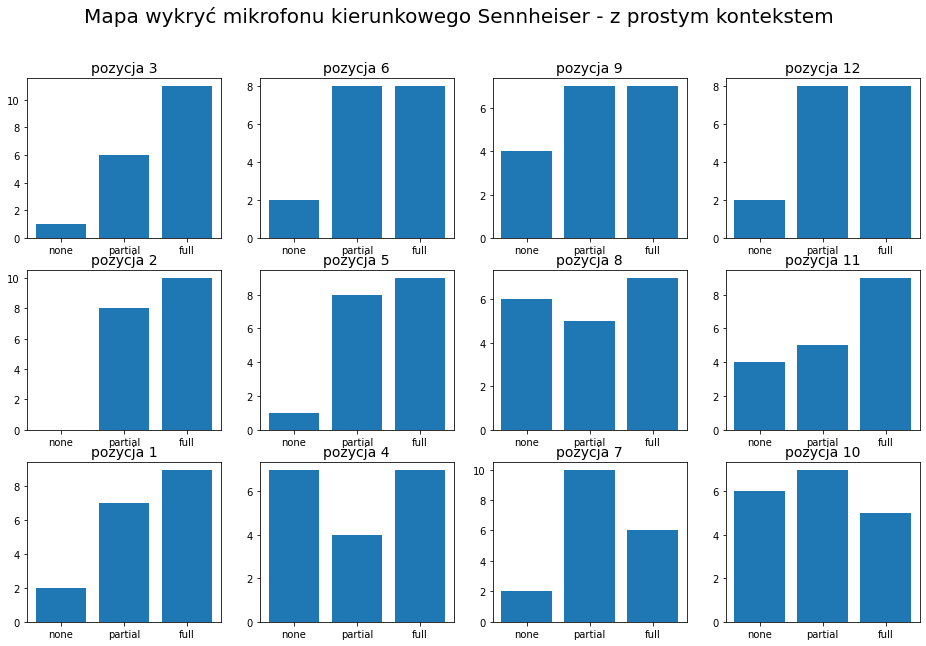

In [38]:
labels = [
    (0,2,'1'), (0,1,'2'), (0,0,'3'),
    (1,2,'4'), (1,1,'5'), (1,0,'6'),
    (2,2,'7'), (2,1,'8'), (2,0,'9'),
    (3,2,'10'), (3,1,'11'), (3,0,'12')
]

x = np.arange(len(labels))
width = 0.3

fig, axs = plt.subplots(3,4, figsize=(16,10))
for (j, i, label) in labels:
    scores = get_bar_scores_for_point(lab_sennheiser_simple_context_df[lab_sennheiser_simple_context_df['punkt'] == int(label)])
    axs[i][j].bar(['none', 'partial', 'full'], scores)
    axs[i][j].set_title(f"pozycja {label}", fontsize=14)

fig.suptitle("Mapa wykryć mikrofonu kierunkowego Sennheiser - z prostym kontekstem", fontsize=20)
plt.show()

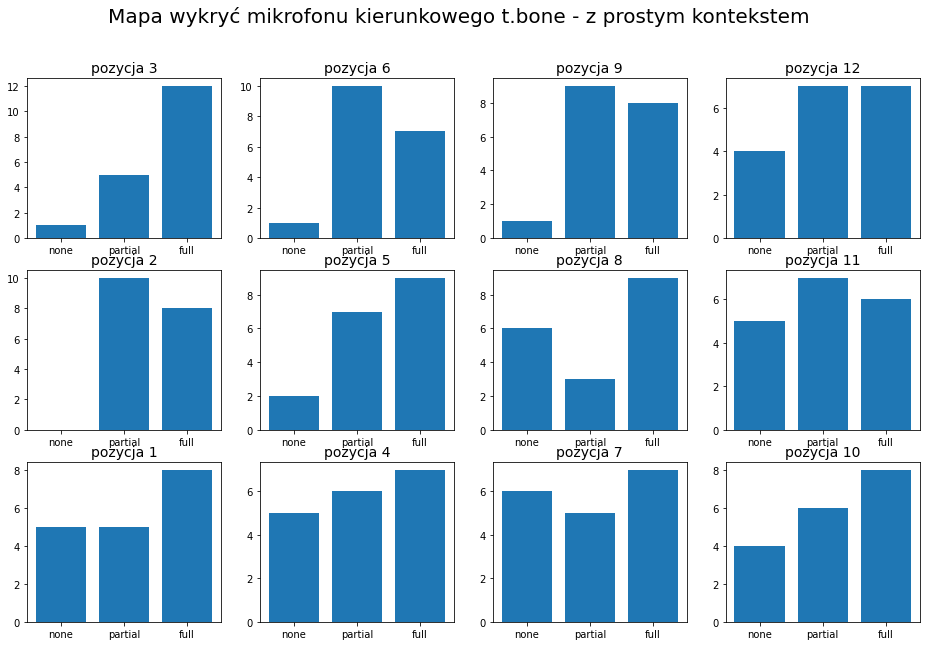

In [39]:
labels = [
    (0,2,'1'), (0,1,'2'), (0,0,'3'),
    (1,2,'4'), (1,1,'5'), (1,0,'6'),
    (2,2,'7'), (2,1,'8'), (2,0,'9'),
    (3,2,'10'), (3,1,'11'), (3,0,'12')
]

x = np.arange(len(labels))
width = 0.3

fig, axs = plt.subplots(3,4, figsize=(16,10))
for (j, i, label) in labels:
    scores = get_bar_scores_for_point(lab_tbone_simple_context_df[lab_tbone_simple_context_df['punkt'] == int(label)])
    axs[i][j].bar(['none', 'partial', 'full'], scores)
    axs[i][j].set_title(f"pozycja {label}", fontsize=14)

fig.suptitle("Mapa wykryć mikrofonu kierunkowego t.bone - z prostym kontekstem", fontsize=20)
plt.show()

#### Z wykorzystaniem pełnego kontekstu

In [40]:
lab_full_context_df = df[(df['eksperyment'] == 'lab') & (df['context'] == 'full')]
lab_rode_full_context_df = lab_full_context_df[lab_full_context_df['mikrofon'] == 'rode']
lab_stagg_full_context_df = lab_full_context_df[lab_full_context_df['mikrofon'] == 'stagg']
lab_sennheiser_full_context_df = lab_full_context_df[lab_full_context_df['mikrofon'] == 'sennheiser']
lab_tbone_full_context_df = lab_full_context_df[lab_full_context_df['mikrofon'] == 'tbone']

lab_rode_full_context_counts = [
    len(lab_rode_full_context_df[lab_rode_full_context_df['result'] == 'none']),
    len(lab_rode_full_context_df[lab_rode_full_context_df['result'] == 'partial']),
    len(lab_rode_full_context_df[lab_rode_full_context_df['result'] == 'full'])
]
lab_stagg_full_context_counts = [
    len(lab_stagg_full_context_df[lab_stagg_full_context_df['result'] == 'none']),
    len(lab_stagg_full_context_df[lab_stagg_full_context_df['result'] == 'partial']),
    len(lab_stagg_full_context_df[lab_stagg_full_context_df['result'] == 'full'])
]
lab_sennheiser_full_context_counts = [
    len(lab_sennheiser_full_context_df[lab_sennheiser_full_context_df['result'] == 'none']),
    len(lab_sennheiser_full_context_df[lab_sennheiser_full_context_df['result'] == 'partial']),
    len(lab_sennheiser_full_context_df[lab_sennheiser_full_context_df['result'] == 'full'])
]
lab_tbone_full_context_counts = [
    len(lab_tbone_full_context_df[lab_tbone_full_context_df['result'] == 'none']),
    len(lab_tbone_full_context_df[lab_tbone_full_context_df['result'] == 'partial']),
    len(lab_tbone_full_context_df[lab_tbone_full_context_df['result'] == 'full'])
]

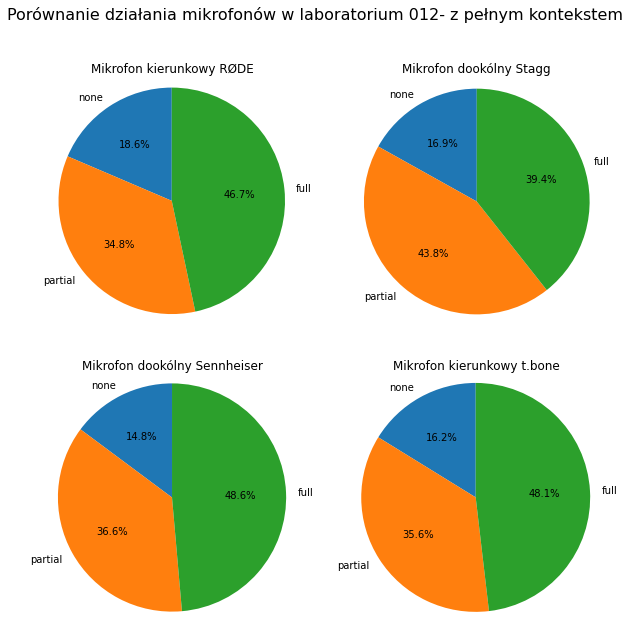

In [41]:
fig, axs = plt.subplots(2,2, figsize=(10, 10))
labels = ['none', 'partial', 'full']

fig.suptitle("Porównanie działania mikrofonów w laboratorium 012- z pełnym kontekstem", fontsize=16)

axs[0][0].pie(lab_rode_full_context_counts, labels=labels, autopct='%1.1f%%', startangle=90)
axs[0][0].set_title('Mikrofon kierunkowy RØDE')
axs[0][0].axis('equal')
axs[0][1].pie(lab_stagg_full_context_counts, labels=labels, autopct='%1.1f%%', startangle=90)
axs[0][1].set_title('Mikrofon dookólny Stagg')
axs[0][1].axis('equal')
axs[1][0].pie(lab_sennheiser_full_context_counts, labels=labels, autopct='%1.1f%%', startangle=90)
axs[1][0].set_title('Mikrofon dookólny Sennheiser')
axs[1][0].axis('equal')
axs[1][1].pie(lab_tbone_full_context_counts, labels=labels, autopct='%1.1f%%', startangle=90)
axs[1][1].set_title('Mikrofon kierunkowy t.bone')
axs[1][1].axis('equal')

plt.show()

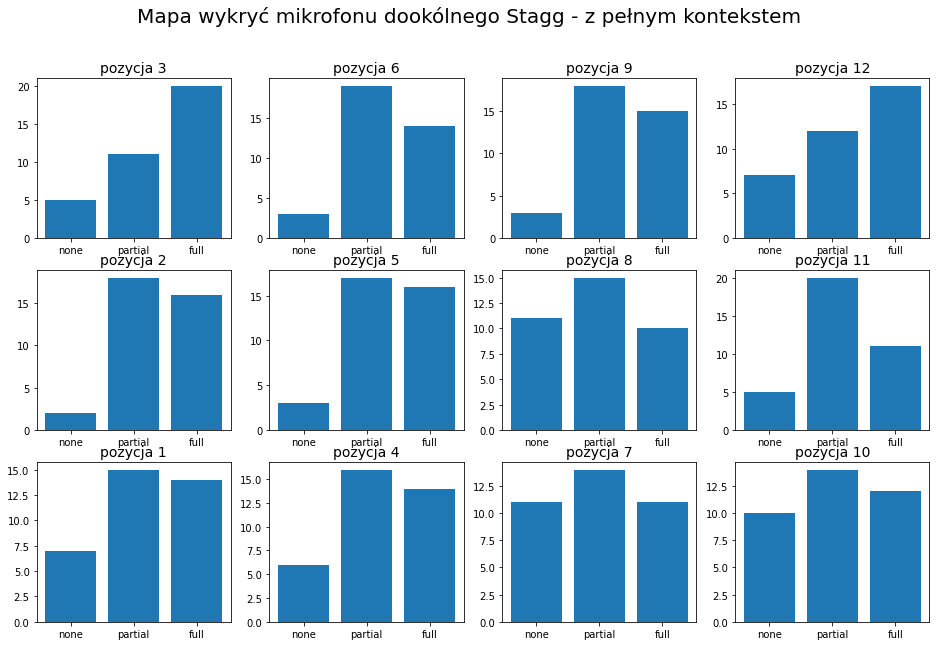

In [42]:
labels = [
    (0,2,'1'), (0,1,'2'), (0,0,'3'),
    (1,2,'4'), (1,1,'5'), (1,0,'6'),
    (2,2,'7'), (2,1,'8'), (2,0,'9'),
    (3,2,'10'), (3,1,'11'), (3,0,'12')
]

x = np.arange(len(labels))
width = 0.3

fig, axs = plt.subplots(3,4, figsize=(16,10))
for (j, i, label) in labels:
    scores = get_bar_scores_for_point(lab_stagg_full_context_df[lab_stagg_full_context_df['punkt'] == int(label)])
    axs[i][j].bar(['none', 'partial', 'full'], scores)
    axs[i][j].set_title(f"pozycja {label}", fontsize=14)

fig.suptitle("Mapa wykryć mikrofonu dookólnego Stagg - z pełnym kontekstem", fontsize=20)
plt.show()

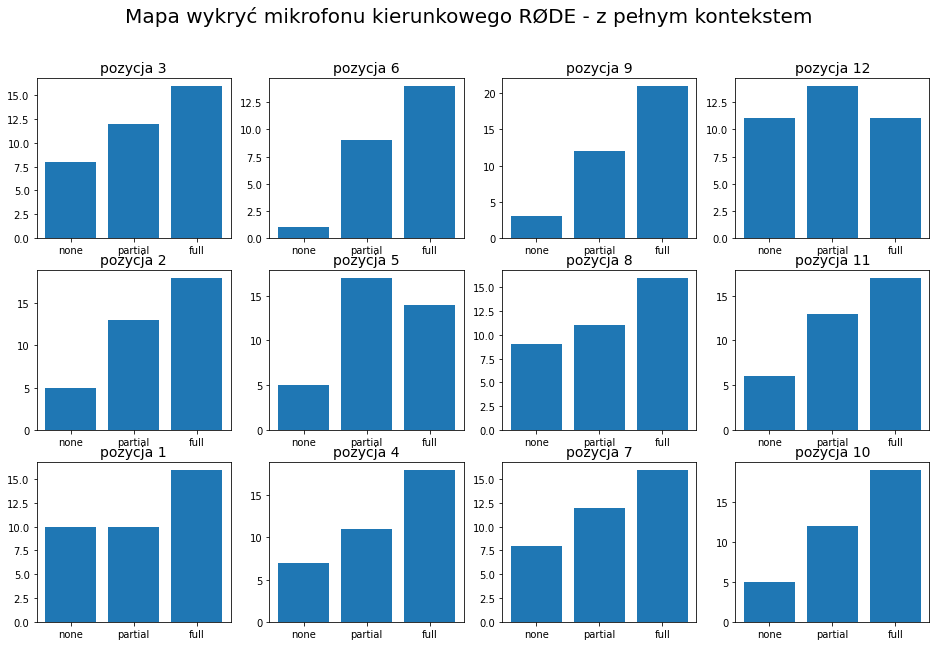

In [43]:
labels = [
    (0,2,'1'), (0,1,'2'), (0,0,'3'),
    (1,2,'4'), (1,1,'5'), (1,0,'6'),
    (2,2,'7'), (2,1,'8'), (2,0,'9'),
    (3,2,'10'), (3,1,'11'), (3,0,'12')
]

x = np.arange(len(labels))
width = 0.3

fig, axs = plt.subplots(3,4, figsize=(16,10))
for (j, i, label) in labels:
    scores = get_bar_scores_for_point(lab_rode_full_context_df[lab_rode_full_context_df['punkt'] == int(label)])
    axs[i][j].bar(['none', 'partial', 'full'], scores)
    axs[i][j].set_title(f"pozycja {label}", fontsize=14)

fig.suptitle("Mapa wykryć mikrofonu kierunkowego RØDE - z pełnym kontekstem", fontsize=20)
plt.show()

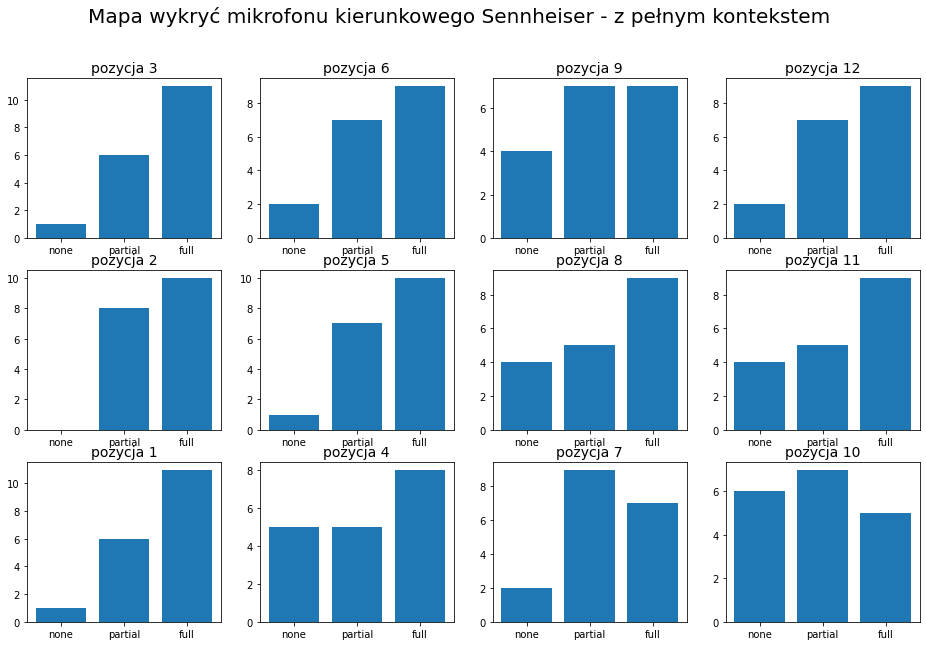

In [44]:
labels = [
    (0,2,'1'), (0,1,'2'), (0,0,'3'),
    (1,2,'4'), (1,1,'5'), (1,0,'6'),
    (2,2,'7'), (2,1,'8'), (2,0,'9'),
    (3,2,'10'), (3,1,'11'), (3,0,'12')
]

x = np.arange(len(labels))
width = 0.3

fig, axs = plt.subplots(3,4, figsize=(16,10))
for (j, i, label) in labels:
    scores = get_bar_scores_for_point(lab_sennheiser_full_context_df[lab_sennheiser_full_context_df['punkt'] == int(label)])
    axs[i][j].bar(['none', 'partial', 'full'], scores)
    axs[i][j].set_title(f"pozycja {label}", fontsize=14)

fig.suptitle("Mapa wykryć mikrofonu kierunkowego Sennheiser - z pełnym kontekstem", fontsize=20)
plt.show()

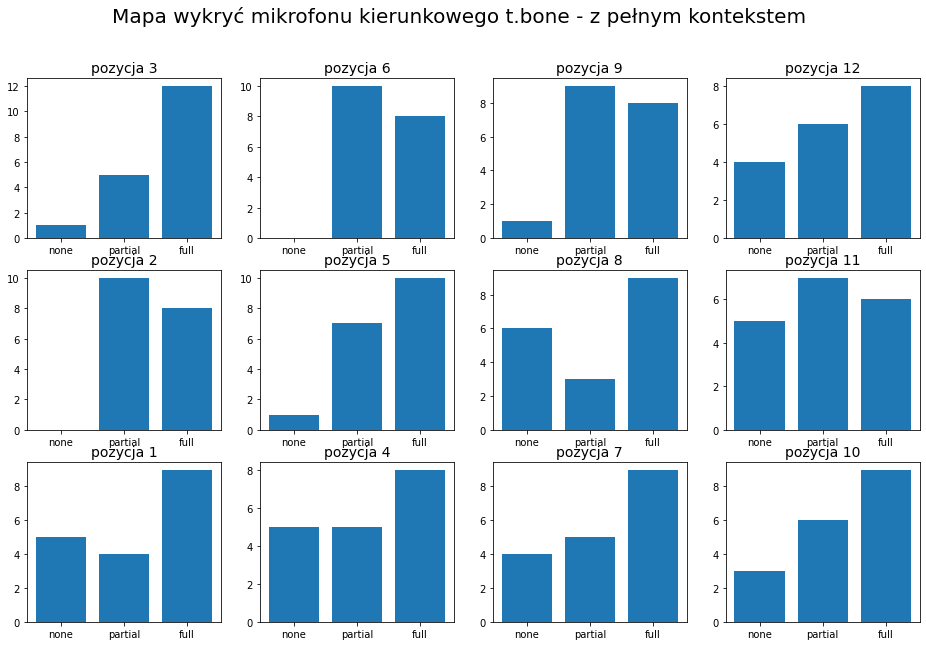

In [45]:
labels = [
    (0,2,'1'), (0,1,'2'), (0,0,'3'),
    (1,2,'4'), (1,1,'5'), (1,0,'6'),
    (2,2,'7'), (2,1,'8'), (2,0,'9'),
    (3,2,'10'), (3,1,'11'), (3,0,'12')
]

x = np.arange(len(labels))
width = 0.3

fig, axs = plt.subplots(3,4, figsize=(16,10))
for (j, i, label) in labels:
    scores = get_bar_scores_for_point(lab_tbone_full_context_df[lab_tbone_full_context_df['punkt'] == int(label)])
    axs[i][j].bar(['none', 'partial', 'full'], scores)
    axs[i][j].set_title(f"pozycja {label}", fontsize=14)

fig.suptitle("Mapa wykryć mikrofonu kierunkowego t.bone - z pełnym kontekstem", fontsize=20)
plt.show()